In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Hierarchical Clustering

In [2]:
df = pd.read_csv('DecisionTree_data_vcluster.csv')
df_all = pd.read_csv('KMeans_data.csv')
df_all

,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
0,760,0,24,1776
1,760,0,0,2154
2,760,0,0,3428
3,572,6,70,531
4,491,0,48,1218
...,...,...,...,...
41932,760,17,212,1464
41933,760,0,0,2151
41934,760,0,44,2514
41935,760,0,0,3200


In [3]:
#df.describe()
df_all.describe()

,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
count,41937.000000,41937.000000,41937.000000,41937.000000
mean,622.423874,1.121873,28.267234,1826.503422
std,204.111222,3.546955,75.610011,1042.480012
min,91.000000,0.000000,0.000000,23.000000
25%,494.000000,0.000000,0.000000,1100.000000
50%,760.000000,0.000000,0.000000,1715.000000
75%,760.000000,1.000000,24.000000,2375.000000
max,760.000000,99.000000,1000.000000,11316.000000


In [4]:
#scaling the features
from scipy.cluster.vq import whiten
scaled_data = whiten(df)
#scaled_data

scaled_data_all = whiten(df_all)
scaled_data_all

array([[3.72350454, 0.        , 0.31742207, 1.7036501 ],
       [3.72350454, 0.        , 0.        , 2.0662513 ],
       [3.72350454, 0.        , 0.        , 3.28835165],
       ...,
       [3.72350454, 0.        , 0.58194046, 2.41158578],
       [3.72350454, 0.        , 0.        , 3.06963982],
       [3.72350454, 0.        , 0.        , 3.82937567]])

In [5]:
df_scaled = pd.DataFrame(scaled_data)
#df_scaled  

df_scaled_data_all = pd.DataFrame(scaled_data_all)
df_scaled_data_all  

,0,1,2,3
0,3.723505,0.000000,0.317422,1.703650
1,3.723505,0.000000,0.000000,2.066251
2,3.723505,0.000000,0.000000,3.288352
3,2.802427,1.691612,0.925814,0.509368
4,2.405580,0.000000,0.634844,1.168382
...,...,...,...,...
41932,3.723505,4.792901,2.803895,1.404360
41933,3.723505,0.000000,0.000000,2.063374
41934,3.723505,0.000000,0.581940,2.411586
41935,3.723505,0.000000,0.000000,3.069640


In [6]:
#renaming columns for labels to be interpreted by the algorithm 
df_scaled.rename(columns = {0:'num_of_days_on_supply', 1:'MRC'}, inplace = True)
#df_scaled 

df_scaled_data_all.rename(columns = {0:'num_of_days_on_supply', 1:'total_num_emails', 2:'cost_to_serve_pa', 3:'MRC'}, inplace = True)
df_scaled_data_all 

,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
0,3.723505,0.000000,0.317422,1.703650
1,3.723505,0.000000,0.000000,2.066251
2,3.723505,0.000000,0.000000,3.288352
3,2.802427,1.691612,0.925814,0.509368
4,2.405580,0.000000,0.634844,1.168382
...,...,...,...,...
41932,3.723505,4.792901,2.803895,1.404360
41933,3.723505,0.000000,0.000000,2.063374
41934,3.723505,0.000000,0.581940,2.411586
41935,3.723505,0.000000,0.000000,3.069640


In [7]:
from scipy.cluster.hierarchy import linkage, fcluster

In [8]:
distance_matrix = linkage(df_scaled_data_all[['num_of_days_on_supply','total_num_emails','cost_to_serve_pa','MRC']], method = 'ward', metric = 'euclidean')

In [13]:
df_scaled_data_all['cluster_labels'] = fcluster(distance_matrix, 4, criterion='maxclust')

In [14]:
df_scaled_data_all

,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC,cluster_labels
0,3.723505,0.000000,0.317422,1.703650,2
1,3.723505,0.000000,0.000000,2.066251,1
2,3.723505,0.000000,0.000000,3.288352,1
3,2.802427,1.691612,0.925814,0.509368,3
4,2.405580,0.000000,0.634844,1.168382,3
...,...,...,...,...,...
41932,3.723505,4.792901,2.803895,1.404360,4
41933,3.723505,0.000000,0.000000,2.063374,1
41934,3.723505,0.000000,0.581940,2.411586,1
41935,3.723505,0.000000,0.000000,3.069640,1


In [15]:
labels_HC = df_scaled_data_all.iloc[: , -1]

In [19]:
labels = labels_HC.tolist()

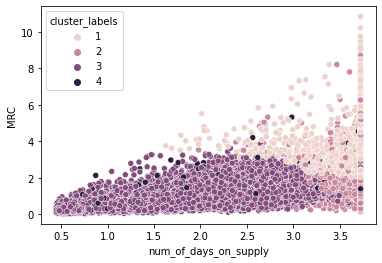

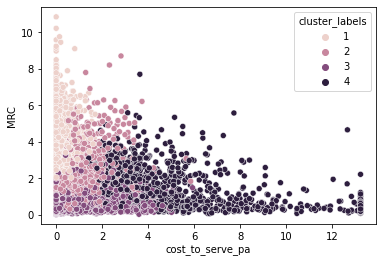

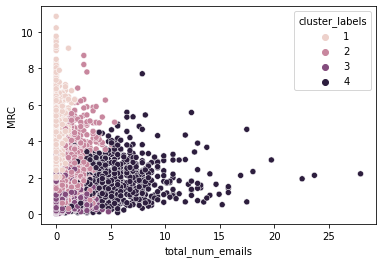

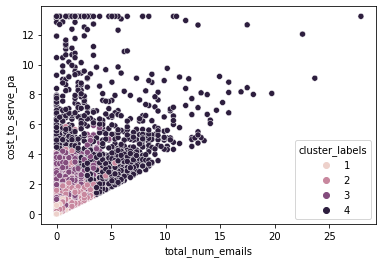

In [18]:
sns.scatterplot(x='num_of_days_on_supply', y='MRC', hue='cluster_labels', data=df_scaled_data_all)
plt.show()
sns.scatterplot(x='cost_to_serve_pa', y='MRC', hue='cluster_labels', data=df_scaled_data_all)
plt.show()
sns.scatterplot(x='total_num_emails', y='MRC', hue='cluster_labels', data=df_scaled_data_all)
plt.show()
sns.scatterplot(x='total_num_emails', y='cost_to_serve_pa', hue='cluster_labels', data=df_scaled_data_all)
plt.show()

## KMeans Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit

In [37]:
df_KM = df_scaled_data_all.iloc[: , :-1]
df_KM

,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
0,3.723505,0.000000,0.317422,1.703650
1,3.723505,0.000000,0.000000,2.066251
2,3.723505,0.000000,0.000000,3.288352
3,2.802427,1.691612,0.925814,0.509368
4,2.405580,0.000000,0.634844,1.168382
...,...,...,...,...
41932,3.723505,4.792901,2.803895,1.404360
41933,3.723505,0.000000,0.000000,2.063374
41934,3.723505,0.000000,0.581940,2.411586
41935,3.723505,0.000000,0.000000,3.069640


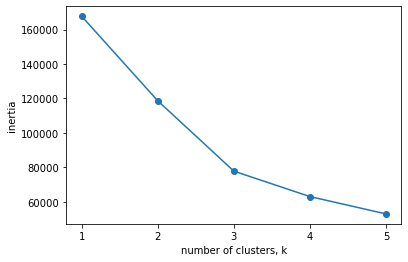

In [23]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_KM)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [38]:
print(model.inertia_)

52967.51735259754


In [24]:
df_KM.describe()

,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
count,41937.000000,41937.000000,41937.000000,41937.000000
mean,3.049471,0.316296,0.373860,1.752096
std,1.000012,1.000012,1.000012,1.000012
min,0.445841,0.000000,0.000000,0.022063
25%,2.420278,0.000000,0.000000,1.055189
50%,3.723505,0.000000,0.000000,1.645135
75%,3.723505,0.281935,0.317422,2.278248
max,3.723505,27.911600,13.225919,10.855014


In [25]:
model_KM = KMeans(n_clusters=4)

In [27]:
# Use fit_predict to fit model and obtain cluster labels: labels
labels_KM = model_KM.fit_predict(df_KM)

In [29]:
labels_KM

array([3, 3, 1, ..., 3, 1, 1], dtype=int32)

In [28]:
print(type(labels_KM))

<class 'numpy.ndarray'>


In [30]:
print(type(labels_HC))

<class 'pandas.core.series.Series'>


In [31]:
labels_HC_n = labels_HC.to_numpy() 

In [32]:
print(type(labels_HC_n))

<class 'numpy.ndarray'>


In [33]:
df_labels = pd.DataFrame({'labels_KM': labels_KM, 'labels_HC_n':labels_HC_n})

In [34]:
df_labels

,labels_KM,labels_HC_n
0,3,2
1,3,1
2,1,1
3,0,3
4,0,3
...,...,...
41932,2,4
41933,3,1
41934,3,1
41935,1,1


In [35]:
ct = pd.crosstab(df_labels['labels_KM'], df_labels['labels_HC_n'])

In [36]:
ct

labels_HC_n,1,2,3,4
labels_KM,,,,
0,0,4,10227,18
1,7107,859,302,6
2,0,77,146,1154
3,3209,15607,3213,8


## Random Forest

In [40]:
# Create a KMeans instance with k clusters: model
#kmeans = KMeans(n_clusters=k) #above
rf = RandomForestClassifier() #above

X = df_all[['num_of_days_on_supply','total_num_emails','cost_to_serve_pa','MRC']].to_numpy()
y = df_scaled_data_all[['cluster_labels']].to_numpy()

In [42]:
y

array([[2],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [43]:
# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [44]:
# Scaling variables
#scaler = StandardScaler()

#Building a pipeline constructor
#pipeline = make_pipeline(scaler,rf)
    
# Fit model to samples
#pipeline.fit(X_train,y_train)
rf.fit(X_train,y_train)
    
y_pred = rf.predict(X_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [73]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.9916542473919523

In [45]:
print(confusion_matrix(y_test, y_pred))

[[4111   22    6    0]
 [  17 6625   26    6]
 [   8   28 5449    8]
 [   0    8   11  450]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      4139
           2       0.99      0.99      0.99      6674
           3       0.99      0.99      0.99      5493
           4       0.97      0.96      0.96       469

    accuracy                           0.99     16775
   macro avg       0.99      0.98      0.99     16775
weighted avg       0.99      0.99      0.99     16775



## RandomSearch for Hyperparameter Tuning

In [50]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [52]:
param_dist = {"max_depth": [2,3],
              "max_features": np.arange(2, 4),
              "min_samples_leaf": np.arange(1, 9),
              "criterion": ["gini", "entropy"]}

In [61]:
pprint(param_dist)

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3],
 'max_features': array([2, 3]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])}


In [62]:
from sklearn.model_selection import RandomizedSearchCV
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5, random_state=42)

In [63]:
rf_cv.fit(X,y)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-pack

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3],
                                        'max_features': array([2, 3]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])},
                   random_state=42)

In [ ]:
rf_cv.fit(X,y)

In [71]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))
print("Best estimator is {}".format(rf_cv.best_estimator_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 3, 'criterion': 'gini'}
Best score is 0.9519041066518744
Best estimator is RandomForestClassifier(max_depth=3, max_features=2)


In [77]:
accuracy_rf_cv = rf_cv.best_score_
accuracy_rf_cv

0.9519041066518744

In [78]:
print('Improvement of {:0.2f}%.'.format( 100 * (accuracy_rf_cv - accuracy_rf) / accuracy_rf))

Improvement of -4.01%.
